In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np

import sys
import os

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *

from annotation_utilities import *

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.path import Path

import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
username = 'yuncong'
# stack = 'MD589'
stack = 'MD594'

In [3]:
label_polygons = load_label_polygons_if_exists(stack, username, force=True, annotation_rootdir=annotation_midbrainIncluded_v2_rootdir)

Section 93 is not in labelings.
Section 94 is not in labelings.
Section 95 is not in labelings.
Label GrC on Section 96 is not recognized.
Label VCA on Section 96 is not recognized.
Section 97 is not in labelings.
Label GrC on Section 98 is not recognized.
Label VCA on Section 98 is not recognized.
Section 99 is not in labelings.
Label VCA on Section 100 is not recognized.
Label GrC on Section 100 is not recognized.
Section 101 is not in labelings.
Label VCA on Section 102 is not recognized.
Section 103 is not in labelings.
Label VCA on Section 104 is not recognized.
Section 105 is not in labelings.
Label VCA on Section 106 is not recognized.
Label VCP on Section 106 is not recognized.
Label DC on Section 106 is not recognized.
Section 107 is not in labelings.
Label DC on Section 108 is not recognized.
Label VCA on Section 108 is not recognized.
Label VCP on Section 108 is not recognized.
Section 109 is not in labelings.
Label VCP on Section 110 is not recognized.
Label VCA on Section 

In [ ]:
# landmark_range_limits = get_landmark_range_limits(label_polygons=label_polygons)

In [5]:
label_polygons_sideAssigned = assign_sideness(label_polygons)

Structure DRV has label on only one section.
Left and right labels for DRI overlap.
[Resolved] using inferred maxL/minR.
Left and right labels for scp overlap.
[Resolved] using inferred maxL/minR.
Structure tz has label on only one section.
Structure MPBE has label on only one section.
Left and right labels for Bar overlap.
[Resolved] using inferred maxL/minR.
Structure PrC has label on only one section.
Left and right labels for RPF overlap.
[Resolved] using inferred maxL/minR.
Left and right labels for LPB overlap.
[Resolved] using inferred maxL/minR.
Left and right labels for IPC overlap.
[Resolved] using inferred maxL/minR.
Left and right labels for IPA overlap.
[Resolved] using inferred maxL/minR.
Left and right labels for IPR overlap.
[Resolved] using inferred maxL/minR.
Left and right labels for 3N overlap.
[Resolved] using inferred maxL/minR.
Structure SCO has label on only one section.
Left and right labels for DTg overlap.
[Resolved] using inferred maxL/minR.
Left and right l

In [6]:
downsample_factor = 16
xy_pixel_distance_downsampled = xy_pixel_distance_lossless * downsample_factor
z_xy_ratio_downsampled = section_thickness / xy_pixel_distance_downsampled

In [13]:
name_list = ['background'] + list(label_polygons_sideAssigned.keys())
print len(name_list)

219


In [41]:
dm = DataManager(stack=stack)

img_height_downsampled = dm.image_height/downsample_factor
img_width_downsampled = dm.image_width/downsample_factor

volume = np.zeros((img_height_downsampled, img_width_downsampled, 
                   int(section_number_lookup[stack]*z_xy_ratio_downsampled)), np.uint8)

print volume.shape

(724, 1028, 1173)


In [42]:
for name in label_polygons_sideAssigned.keys():
    print name
    index = name_list.index(name)
    
    contours_grouped_by_z = {}
    for sec, xys in label_polygons_sideAssigned[name].dropna().to_dict().iteritems():
        z0, z1 = DataManager.convert_section_to_z(stack=stack, sec=sec, downsample=downsample_factor)
        z = (z0 + z1) / 2
        contours_grouped_by_z[z] = xys / downsample_factor
        
    interpolated_contours = get_interpolated_contours(contours_grouped_by_z)
    
    interpolated_interior_points = {z: points_inside_contour(contour_pts.astype(np.int)) 
                                    for z, contour_pts in interpolated_contours.iteritems()}
    
    occupied_names_covered = np.zeros((len(name_list), ), np.int)
    
    for z, xys in interpolated_interior_points.iteritems():
        occupied_names_covered += np.bincount(volume[xys[:,1], xys[:,0], z], minlength=len(name_list))
        volume[xys[:,1], xys[:,0], z] = index
    occupied_names_percentage = occupied_names_covered / float(occupied_names_covered.sum())
    print 'percent of this structure overlapping and replacing existing structures =', \
    {name_list[i]: percent for i, percent in enumerate(occupied_names_percentage) if i != 0 and i != index and percent > 0}

10N_L
{}
10N_R
{}
12N
{'10N_R': 1.3951126413946662e-05, '10N_L': 0.00023716914903709326}
3N_L
{}
3N_R
{}
4N_L
{}
4N_R
{}
5N_L
{}
5N_R
{}
6N_L
{}
6N_R
{}
7N2_L
{}
7N2_R
{}
7N_L
{}
7N_R
{}
7n_L
{}
7n_R
{'6N_R': 0.0007579266495431387}
8n_L
{}
8n_R
{}
AP
{}
APT_L
{}
APT_R
{}
Amb_L
{}
Amb_R
{}
Bar_L
{}
Bar_R
{}
CGA_R
{}
CereNuc_L
{}
CereNuc_R
{}
CnF_L
{}
CnF_R
{}
Cu_L
{}
Cu_R
{}
DCDp_L
{}
DCDp_R
{}
DCFu_L
{'DCDp_L': 0.00081833060556464816, 'DCDp_R': 0.00011690437222352116}
DCFu_R
{}
DCMo_L
{'DCFu_L': 0.025077430312718554}
DCMo_R
{'DCFu_R': 0.02072538860103627}
DC_L
{'DCMo_R': 0.0021583612358322046, 'DCFu_L': 0.023574416603477803, 'DCDp_R': 0.0093008329570400915, 'DCDp_L': 0.0092724334670949305, 'DCMo_L': 0.028016096830900918, 'DCFu_R': 0.0019084457243147912}
DC_R
{}
DLL_L
{}
DLL_R
{}
DPO_L
{}
DPO_R
{}
DRD_L
{}
DRD_R
{}
DRI_L
{}
DRI_R
{}
DRV_L
{}
DTgC_L
{}
DTgC_R
{}
DTgP_L
{'DTgC_L': 0.002950174825174825}
DTgP_R
{'DTgC_R': 0.0062762819305843221}
DTg_L
{}
DTg_R
{}
Dk_L
{}
Dk_R
{}
ECu_L
{}
ECu

In [ ]:
# # interpolate contours

# t = time.time()

# interpolated_contours = [{} for _ in range(int(z_xy_ratio_downsampled*section_number_lookup[stack]))]
    
# for name in label_polygons_sideAssigned.keys():
    
    
    
    
#     considered_secs = label_polygons_sideAssigned[name].dropna().keys()
    
#     n = len(considered_secs)
    
#     for i in range(n):
#         sec = considered_secs[i]            
#         z0 = int(z_xy_ratio_downsampled*sec)
#         interpolated_contours[z0][name] = label_polygons_sideAssigned.loc[sec][name]
#         if i + 1 < n:
#             next_sec = considered_secs[i+1]
#             z1 = int(z_xy_ratio_downsampled*next_sec)
#             interp_cnts = interpolate_contours(label_polygons_sideAssigned.loc[sec][name], 
#                                                label_polygons_sideAssigned.loc[next_sec][name],
#                                                z1-z0+1)
#             for zi, z in enumerate(range(z0+1, z1)):
#                 interpolated_contours[z][name] = interp_cnts[zi+1]
                
# sys.stderr.write('interpolate contours: %.2f seconds\n' % (time.time() - t)) # ~37s

In [ ]:
# name_list = ['background'] + list(label_polygons_sideAssigned.keys())
# print len(name_list)

In [12]:
# dm = DataManager(stack=stack)

# img_height_downsampled = dm.image_height/downsample_factor
# img_width_downsampled = dm.image_width/downsample_factor

# volume = np.zeros((img_height_downsampled, img_width_downsampled, 
#                    int(section_number_lookup[stack]*z_xy_ratio_downsampled)), np.uint8)

# print volume.shape

(724, 1028, 1173)


In [ ]:
# t = time.time()


# for z in range(volume.shape[2]):
        
#     if len(interpolated_contours[z]) == 0:
#         continue
    
#     label_map_downsampled = np.zeros((img_height_downsampled, img_width_downsampled), np.int8)
    
#     for name_s, vs in interpolated_contours[z].iteritems():
#         vs_downsampled = vs/downsample_factor
        
#         xmin, ymin = np.min(vs_downsampled, axis=0).astype(np.int)
#         xmax, ymax = np.max(vs_downsampled, axis=0).astype(np.int)
                
#         xmin = max(0, xmin)
#         ymin = max(0, ymin)
#         xmax = min(xmax, img_width_downsampled-1)
#         ymax = min(ymax, img_height_downsampled-1)
        
#         xs, ys = np.meshgrid(range(xmin, xmax+1), range(ymin, ymax+1))
#         points_to_test = np.c_[xs.flat, ys.flat]
                
#         is_contained = Path(vs_downsampled).contains_points(points_to_test)
#         label_map_downsampled[points_to_test[is_contained, 1], 
#                               points_to_test[is_contained, 0]] = name_list.index(name_s)
        
#     volume[:, :, z] = label_map_downsampled.copy()
    
#     del label_map_downsampled
    
# sys.stderr.write('build volume all: %.2f seconds\n' % (time.time() - t)) # ~37s

In [24]:
np.unique(volume)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

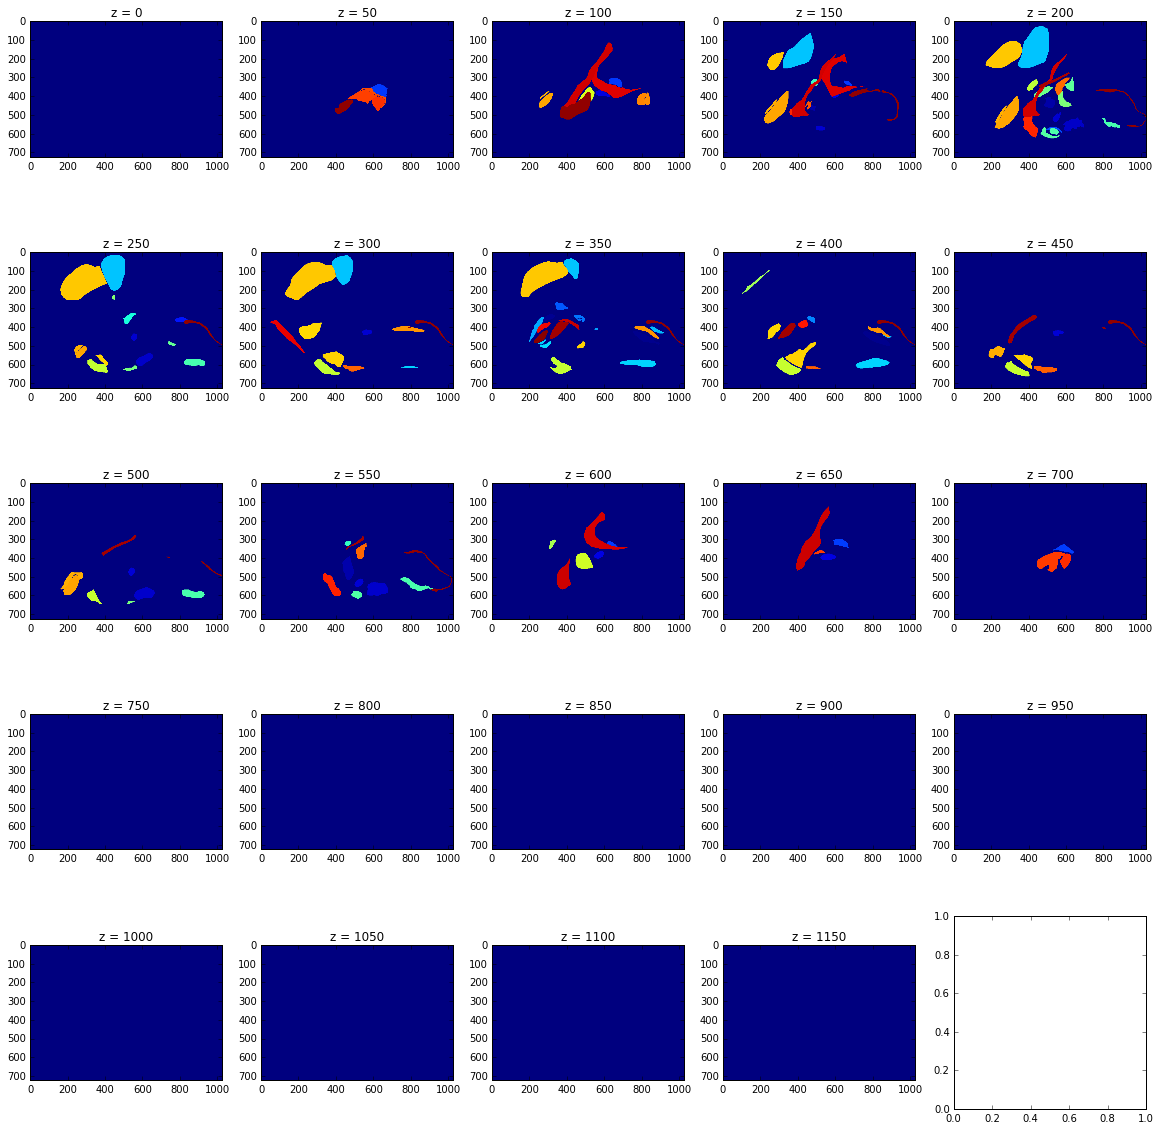

In [25]:
fig, axes = plt.subplots(5, 5, figsize=(20,20) , squeeze=True);
axes = axes.flatten()
for i, z in enumerate(range(0, volume.shape[2], 50)):
    axes[i].imshow(volume[..., z], vmin=0, vmax=len(name_list));
    axes[i].set_title('z = %d' % z);
plt.show();

In [26]:
xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(volume)

print 'volume bbox dimension:', xmin, xmax, ymin, ymax, zmin, zmax

reduced_xdim = xmax+1-xmin
reduced_ydim = ymax+1-ymin
reduced_zdim = zmax+1-zmin
print 'reduced bbox dimension:', reduced_xdim, reduced_ydim, reduced_zdim

volume bbox dimension: 19 1026 18 666 11 733
reduced bbox dimension: 1008 649 723


In [27]:
reduced_volume = volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1]

In [28]:
# output

bp.pack_ndarray_file(reduced_volume, os.path.join(volume_dir, '%(stack)s/%(stack)s_annotationVolume.bp' % {'stack': stack}))

In [29]:
with open(os.path.join(volume_dir, '%(stack)s/%(stack)s_annotationVolume_limits.txt' % {'stack': stack}), 'w') as f:
        f.write((' '.join(['%d']*6)+'\n') % (xmin, xmax, ymin, ymax, zmin, zmax))
        
with open(os.path.join(volume_dir, '%(stack)s/%(stack)s_annotationVolume_resolution.txt' % {'stack': stack}), 'w') as f:
        f.write((' '.join(['%f']*3)+'\n') % (downsample_factor, xy_pixel_distance_downsampled, z_xy_ratio_downsampled))

In [45]:
with open(os.path.join(volume_dir, '%(stack)s/%(stack)s_annotationVolume_landmarkBboxes.txt' % {'stack': stack}), 'w') as f:
    for index, name in enumerate(name_list):
        if name == 'background': continue
        
        try:
            bbox = bbox_3d(reduced_volume == index)
        except Exception as e:
            sys.stderr.write('Error computing bounding box for structure %s\n' % name)
            bbox = (0,0,0,0,0,0)
                        
        f.write(name + ' ' + ' '.join(map(str, bbox)) + '\n')

Error computing bounding box for structure DCFu_R
Error computing bounding box for structure PPT_L


In [46]:
with open(os.path.join(volume_dir, '%(stack)s/%(stack)s_annotationVolume_labelIndices.txt' % {'stack': stack}), 'w') as f:
#     f.write('BackG 0\n')
    for index, name_s in enumerate(name_list):
        f.write(name_s + ' ' + str(index) + '\n')